In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [3]:
class Config:
    def __init__(self):
        self.ROOT_DATA_DIR="FashionMNIST"
        self.EPOCH=50
        self.BATCH_SIZE=32
        self.LEARNING_RATE=0.001
        self.IMAGE_SIZE=(28,28)
        self.DEVICE="cuda" if torch.cuda.is_available() else "cpu"
        print(f"This notebook is using the device: {self.DEVICE}")
        self.SEED=2022
config=Config()

This notebook is using the device: cpu


In [6]:
# Donload the datasets
train_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [7]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [10]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
given_label_map=train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [14]:
label_map={val:key for key,val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [24]:
train_data.targets[7].item()

2

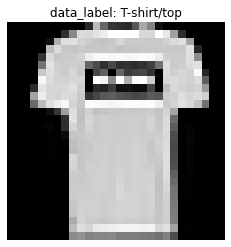

In [23]:
# Visualize one of the samples
def view_sample_img(data, idx, label_map):
    idx=1
    plt.imshow(train_data.data[idx], cmap="gray")
    plt.title(f"data_label: {label_map[train_data.targets[idx].item()]}")
    plt.axis("off")
view_sample_img(train_data,7,label_map)

In [ ]:
# Create the DataLoader
train_data_loader=